In [ ]:
import requests  # For making HTTP requests to the COVID-19 API
import pandas as pd  # For handling and cleaning tabular data
import matplotlib.pyplot as plt  # For creating charts

In [ ]:
url = "https://disease.sh/v3/covid-19/countries"  # Public API for country-level COVID data
response = requests.get(url)  # Send a GET request to fetch the data
data = response.json()  # Convert the JSON response to Python data

df = pd.json_normalize(data)  # Flatten nested JSON into a table
print(df.head())  # Show the first 5 rows of the DataFrame

         updated      country   cases  todayCases  deaths  todayDeaths  \
0  1744135899993  Afghanistan  234174           0    7996            0   
1  1744135899982      Albania  334863           0    3605            0   
2  1744135899985      Algeria  272010           0    6881            0   
3  1744135900044      Andorra   48015           0     165            0   
4  1744135900017       Angola  107327           0    1937            0   

   recovered  todayRecovered  active  critical  ...  oneTestPerPeople  \
0     211080               0   15098         0  ...                29   
1     330233               0    1025         0  ...                 1   
2     183061               0   82068         0  ...               196   
3          0               0   47850         0  ...                 0   
4     103419               0    1971         0  ...                23   

   activePerOneMillion  recoveredPerOneMillion  criticalPerOneMillion  \
0               370.46                 5179

In [ ]:
columns_to_keep = ['country', 'cases', 'todayCases', 'deaths', 'recovered', 'active', 'updated']
df_clean = df[columns_to_keep].copy()
df_clean['updated'] = pd.to_datetime(df_clean['updated'], unit='ms')
df_clean.head()

,country,cases,todayCases,deaths,recovered,active,updated
0,Afghanistan,234174,0,7996,211080,15098,2025-04-08 18:11:39.993
1,Albania,334863,0,3605,330233,1025,2025-04-08 18:11:39.982
2,Algeria,272010,0,6881,183061,82068,2025-04-08 18:11:39.985
3,Andorra,48015,0,165,0,47850,2025-04-08 18:11:40.044
4,Angola,107327,0,1937,103419,1971,2025-04-08 18:11:40.017


In [ ]:
# Save as CSV file in Colab's virtual file system
df_clean.to_csv("covid_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("covid_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

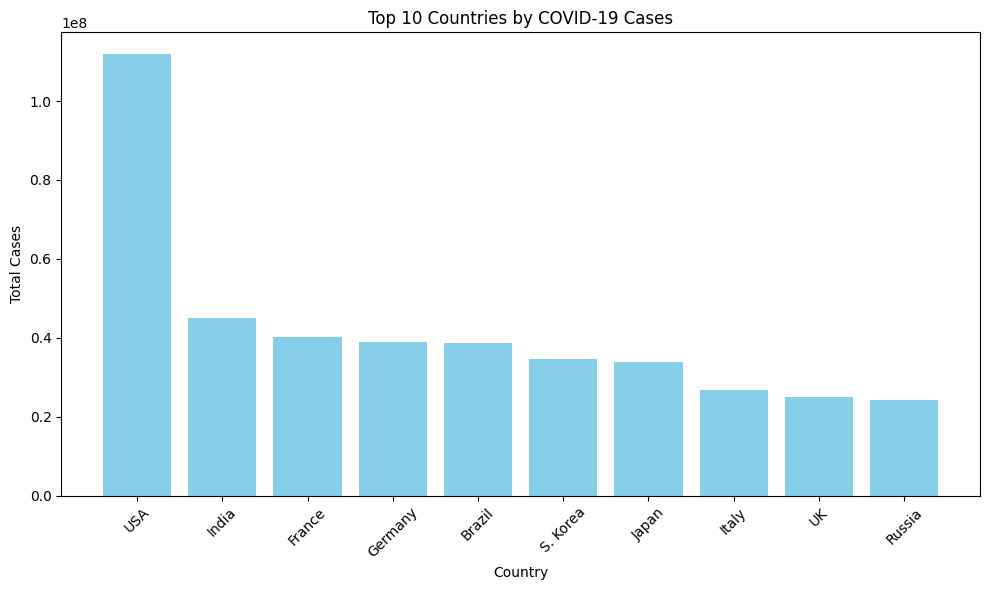

In [ ]:
top_10 = df_clean.sort_values(by='cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10['country'], top_10['cases'], color='skyblue')
plt.title("Top 10 Countries by COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()